In [161]:
from cmath import nan
import csv
import pandas as pd
import numpy as np
import sklearn.preprocessing as onehotencode
import matplotlib.pyplot as plt
from decimal import Decimal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [162]:
##Load data

##read COE bidding exercise
file = "D:\Personal\DS\Results of COE Bidding Exercise - Results.csv"
coe_new_df = pd.read_csv(file)
##coe_new_df = coe_df
coe_new_df = coe_new_df.reindex(columns = coe_new_df.columns.tolist() 
                                  + ['Data Series','Bid no'])
##print(coe_new_df)
##filter out only cat A and B and change month and year values to fit other datasets
for ind in coe_new_df.index:
    year_month = coe_new_df['Bidding Exercise'][ind]
    year_month = year_month.split(' ')
    year_month = year_month[1] + " " + year_month[0][0:3]
    ##print (year_month) 
    ##coe_new_df["Data Series"][ind] = year_month
    coe_new_df.at[ind,'Data Series'] = year_month
    bid_no = coe_new_df['Bidding Exercise'][ind]
    bid_no = bid_no.split(' ')
    if bid_no[2] == "Second":
        bid_no = 2
    elif bid_no[2] == "First":
        bid_no = 1
    else:
        bid_no = 0
    ##coe_new_df["Bid no"][ind] = bid_no
    coe_new_df.at[ind, 'Bid no'] = bid_no
    cat = coe_new_df['Category'][ind]
    cat = cat.split(' ')
    cat = cat[0] + " " + cat[1]
    ##coe_new_df['Category'][ind] = cat
    coe_new_df.at[ind, 'Category'] = cat
options = ['Cat A', 'Cat B']
coe_new_df = coe_new_df[coe_new_df['Category'].isin(options)]
##print(coe_new_df['Data Series'])

##read CPI index
file = "D:\Personal\DS\M212881.csv"
cpi_df = pd.read_csv(file, skiprows=10)
cpi_df['Data Series'] = cpi_df['Data Series'].str.strip()
##print(cpi_df.head())
cpi_df = cpi_df[cpi_df['Data Series'] == "Cars"]
cpi_new_df = cpi_df.set_index('Data Series').T
cpi_new_df = cpi_new_df.reset_index()
cpi_new_df = cpi_new_df.rename(columns = {'index': 'Data Series', 'Cars': 'CPI Index'})
##print(cpi_df)

##read new registration vehicles monthly data
file = "D:\Personal\DS\M650281.csv"
n_veh_df = pd.read_csv(file, skiprows=10)
n_veh_df['Data Series'] = n_veh_df['Data Series'].str.strip()
options = ['Category A: Cars', 'Category B: Cars']
n_veh_df = n_veh_df[n_veh_df['Data Series'].isin(options)]
for ind in n_veh_df.index:
    car_type_str = n_veh_df['Data Series'][ind].split(' ')
    finstr = car_type_str[0][0:3]  + " " + car_type_str[1][0:1]
    ##print(finstr)
    n_veh_df['Data Series'][ind] = finstr
n_veh_df = n_veh_df.set_index('Data Series').T
n_veh_df = n_veh_df.reset_index()
n_veh_df = n_veh_df.rename(columns = {'index': 'Data Series', 'Cat A': 'Cat A Veh Amount', 'Cat B': 'Cat B Veh Amount'})
##print (n_veh_df)

##read motor vehicles deregistered monthly data
file = "D:\Personal\DS\M650291.csv"
dereg_veh_df = pd.read_csv(file, skiprows=10)
dereg_veh_df['Data Series'] = dereg_veh_df['Data Series'].str.strip()
options = ['Category A: Cars', 'Category B: Cars']
dereg_veh_df = dereg_veh_df[dereg_veh_df['Data Series'].isin(options)]
for ind in dereg_veh_df.index:
    car_type_str = dereg_veh_df['Data Series'][ind].split(' ')
    finstr = car_type_str[0][0:3]  + " " + car_type_str[1][0:1]
    ##print(finstr)
    dereg_veh_df['Data Series'][ind] = finstr
dereg_veh_df = dereg_veh_df.set_index('Data Series').T
dereg_veh_df = dereg_veh_df.reset_index()
dereg_veh_df = dereg_veh_df.rename(columns = {'index': 'Data Series', 'Cat A': 'Cat A Veh Amount', 'Cat B': 'Cat B Veh Amount'})
##print (dereg_veh_df)

##read motor vehicles under vehicle quota system monthly data
file = "D:\Personal\DS\M650341.csv"
pop_veh_df = pd.read_csv(file, skiprows=10)
pop_veh_df['Data Series'] = pop_veh_df['Data Series'].str.strip()
options = ['Category A: Cars', 'Category B: Cars']
pop_veh_df = pop_veh_df[pop_veh_df['Data Series'].isin(options)]
for ind in pop_veh_df.index:
    car_type_str = pop_veh_df['Data Series'][ind].split(' ')
    finstr = car_type_str[0][0:3]  + " " + car_type_str[1][0:1]
    ##print(finstr)
    pop_veh_df['Data Series'][ind] = finstr
pop_veh_df = pop_veh_df.set_index('Data Series').T
pop_veh_df = pop_veh_df.reset_index()
pop_veh_df = pop_veh_df.rename(columns = {'index': 'Data Series', 'Cat A': 'Cat A Veh Amount', 'Cat B': 'Cat B Veh Amount'})
##print (pop_veh_df)

## read oil prices dataset
file = "D:\Personal\DS\oil_price_per_gallon.csv"
oil_price_df = pd.read_csv(file)
for ind in oil_price_df.index:
    dataseriesstr = oil_price_df['Month'][ind].split(' ')
    fin_oil_str = dataseriesstr[1] + " " + dataseriesstr[0]
    oil_price_df.at[ind, 'Month'] = fin_oil_str

##print(oil_price_df)
## combine datasets
##final_df = pd.merge(coe_new_df, cpi_new_df, left_on="Data Series", right_on="Data Series")
final_df = coe_new_df
final_df = final_df.reindex(columns = final_df.columns.tolist() 
                                  + ['New Veh Amt','Dereg Veh Amt', 'Vehicle Quota', 'CPI', 'Oil_Price'])
##for col in final_df.columns:
##    print (col)
for ind in final_df.index:
    for tind in n_veh_df.index:
        finym = final_df['Data Series'][ind].strip()
        ##print(finym)
        tinym = cpi_new_df['Data Series'][tind].strip()
        ##print(tinym)
        cater = final_df['Category'][ind].strip()
        if (finym == tinym):
            final_df.at[ind, 'CPI'] = cpi_new_df['CPI Index'][tind]
            break
for ind in final_df.index:
    for tind in n_veh_df.index:
        finym = final_df['Data Series'][ind].strip()
        ##print(finym)
        tinym = n_veh_df['Data Series'][tind].strip()
        ##print(tinym)
        cater = final_df['Category'][ind].strip()
        if (finym == tinym and cater == "Cat A"):
            final_df.at[ind, 'New Veh Amt'] = n_veh_df['Cat A Veh Amount'][tind]
            break
        elif (finym == tinym and cater == "Cat B"):
            final_df.at[ind, 'New Veh Amt'] = n_veh_df['Cat B Veh Amount'][tind]
            break
for ind in final_df.index:
    for tind in dereg_veh_df.index:
        finym = final_df['Data Series'][ind].strip()
        ##print(finym)
        tinym = dereg_veh_df['Data Series'][tind].strip()
        ##print(tinym)
        cater = final_df['Category'][ind].strip()
        if (finym == tinym and cater == "Cat A"):
            final_df.at[ind, 'Dereg Veh Amt'] = dereg_veh_df['Cat A Veh Amount'][tind]
            break
        elif (finym == tinym and cater == "Cat B"):
            final_df.at[ind, 'Dereg Veh Amt'] = dereg_veh_df['Cat B Veh Amount'][tind]
            break
for ind in final_df.index:
    for tind in pop_veh_df.index:
        finym = final_df['Data Series'][ind].strip()
        ##print(finym)
        tinym = pop_veh_df['Data Series'][tind].strip()
        ##print(tinym)
        cater = final_df['Category'][ind].strip()
        if (finym == tinym and cater == "Cat A"):
            final_df.at[ind, 'Vehicle Quota'] = pop_veh_df['Cat A Veh Amount'][tind]
            break
        elif (finym == tinym and cater == "Cat B"):
            final_df.at[ind, 'Vehicle Quota'] = pop_veh_df['Cat B Veh Amount'][tind]
            break
for ind in final_df.index:
    for tind in oil_price_df.index:
        finym = final_df['Data Series'][ind].strip()
        ##print(finym)
        tinym = oil_price_df['Month'][tind].strip()
        ##print(tinym)
        if (finym == tinym):
            final_df.at[ind, 'Oil_Price'] = oil_price_df['Price'][tind]
            break
        else:
            final_df.at[ind, 'Oil_Price'] = 1

##print(final_df)

In [163]:
## Data Cleaning and wrangling
## check for missing values
print (sum(final_df.isnull().any(axis=1)))
##since only 4 records are NaN we will be dropping them

final_df = final_df[final_df['CPI'].notna()]

## large number of CPI index missing. to fill in with Average values of the total CPIs over the years for each cell
sum_cpi = 0
count = 0
avg_cpi = 0
for ind in final_df.index:
    if final_df['CPI'][ind] != "na":
        cpi = final_df['CPI'][ind]
        sum_cpi = sum_cpi + Decimal(cpi)
        count = count + 1
    elif final_df['CPI'][ind] == "na":
        avg_cpi = sum_cpi / count
        final_df.at[ind, 'CPI'] = round(avg_cpi,3)
        sum_cpi = sum_cpi + avg_cpi
        count = count + 1
    ##print(sum_cpi)
    ##print(avg_cpi)

final_df.to_csv('D:\Personal\DS\Carro\Result.csv')

## break date into day month
final_df = final_df.reindex(columns = final_df.columns.tolist() 
                                  + ['Day','Month'])
for ind in final_df.index:
    dmy = final_df['Announcement Date'][ind].split('/')
    day = dmy[0]
    month = dmy[1]
    final_df.at[ind, 'Day'] = day
    final_df.at[ind, 'Month'] = month
##print(final_df)

## convert Category, Data Series to numbers through onehotencoding
labelenc = onehotencode.LabelEncoder()
new_data = labelenc.fit_transform(final_df['Data Series'])
final_df = final_df.reindex(columns = final_df.columns.tolist() 
                                  + ['Data Series Encoded','Category Encoded'])
final_df['Data Series Encoded'] = new_data
new_data = labelenc.fit_transform(final_df['Category'])
final_df['Category Encoded'] = new_data

## convert columns to a decimal
for ind in final_df.index:
    prem = final_df['Quota Premium'][ind].strip()
    prem = prem[1:len(prem)]
    prem = prem.replace(',','')
    prem = Decimal(prem)
    final_df.at[ind, 'Quota Premium'] = prem
    prem = final_df['Total Bids Received'][ind].strip()
    prem = prem.replace(',','')
    prem = Decimal(prem)
    final_df.at[ind, 'Total Bids Received'] = prem
    prem = final_df['Number of Successful Bids'][ind].strip()
    prem = prem.replace(',','')
    prem = Decimal(prem)
    final_df.at[ind, 'Number of Successful Bids'] = prem
    prem = str(final_df['New Veh Amt'][ind]).strip()
    prem = prem.replace(',','')
    prem = Decimal(prem)
    final_df.at[ind, 'New Veh Amt'] = prem
    prem = str(final_df['Dereg Veh Amt'][ind]).strip()
    prem = prem.replace(',','')
    prem = Decimal(prem)
    final_df.at[ind, 'Dereg Veh Amt'] = prem
    prem = str(final_df['Vehicle Quota'][ind]).strip()
    prem = prem.replace(',','')
    prem = Decimal(prem)
    final_df.at[ind, 'Vehicle Quota'] = prem


4


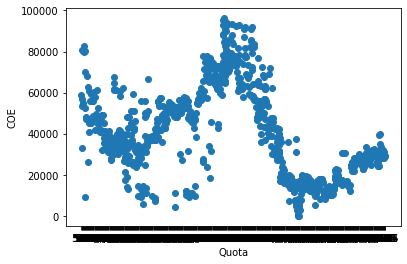

In [164]:
plt.plot(final_df['Quota'], final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Quota')
plt.show()

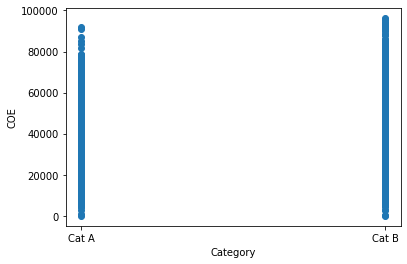

In [165]:
plt.plot(final_df['Category'], final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Category')
plt.show()

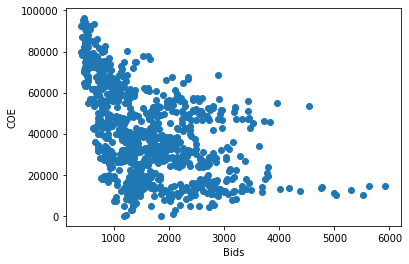

In [166]:
plt.plot(final_df['Total Bids Received'], final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Bids')
plt.show()

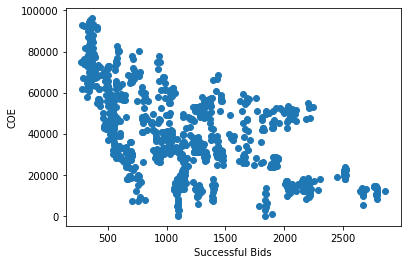

In [167]:
plt.plot(final_df['Number of Successful Bids'], final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Successful Bids')
plt.show()

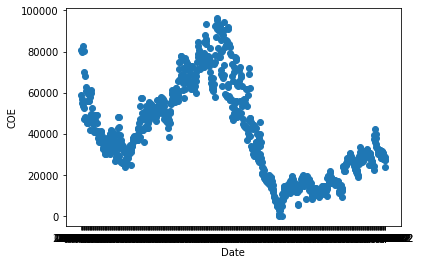

In [168]:
plt.plot(final_df['Announcement Date'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Date')
plt.show()

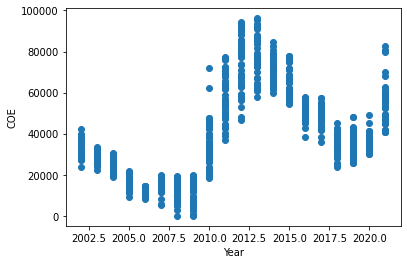

In [169]:
plt.plot(final_df['Year'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Year')
plt.show()

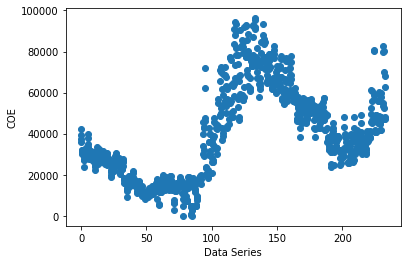

In [170]:
plt.plot(final_df['Data Series Encoded'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Data Series')
plt.show()

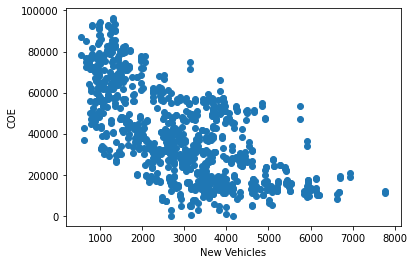

In [171]:
plt.plot(final_df['New Veh Amt'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('New Vehicles')
plt.show()

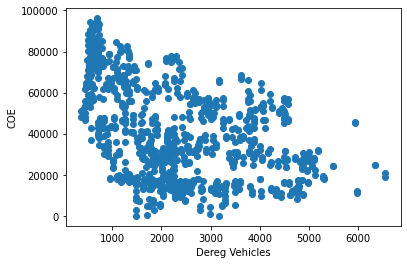

In [172]:
plt.plot(final_df['Dereg Veh Amt'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Dereg Vehicles')
plt.show()

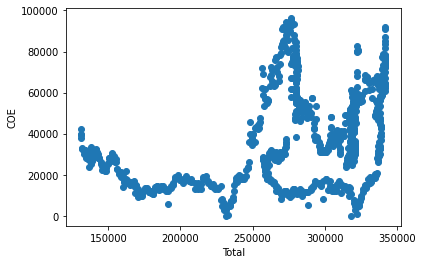

In [173]:
plt.plot(final_df['Vehicle Quota'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Total')
plt.show()

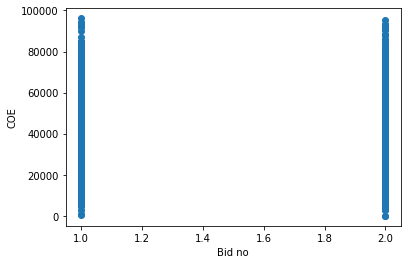

In [174]:
plt.plot(final_df['Bid no'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Bid no')
plt.show()

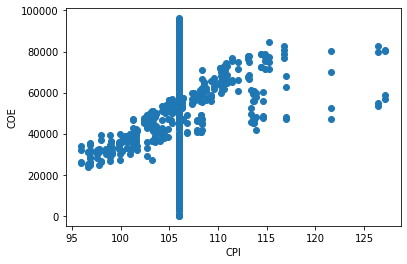

In [175]:
plt.plot(final_df['CPI'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('CPI')
plt.show()

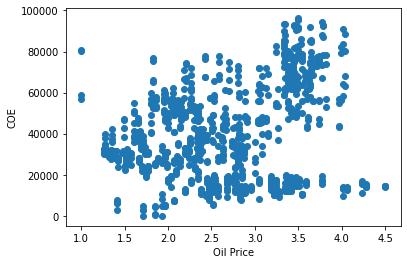

In [176]:
plt.plot(final_df['Oil_Price'] , final_df['Quota Premium'], 'o')
plt.ylabel('COE')
plt.xlabel('Oil Price')
plt.show()

In [177]:
## Feature Selection 
## Chosen features inclues:
## Total Bids Received
## Number of Successful Bids
## CPI
## New Vehical Amount
## Dereg Vehical Amount
## Vehicle Quota
## Oil Prices
## Category Encoded
## features are included as per observed from the graphs. Even though the graphs have a number of outlier points, i can see the general direction in which each column could be relative to the way the COE Premium is being affected. 

## Modify Final df into 2 data frames by seperating the other attributes from the predicting attribute
model_df = final_df[['Total Bids Received', 'Number of Successful Bids', 'CPI', 'New Veh Amt', 'Dereg Veh Amt', 'Vehicle Quota', 'Oil_Price', 'Category Encoded', 'Quota Premium']]
y = model_df['Quota Premium']
x = model_df.drop('Quota Premium',axis = 1)
category = pd.get_dummies(x,drop_first=True)
x = x.drop('Category Encoded',axis=1)
x = pd.concat([x,category],axis=1)
##print(x)
##print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

## Chose the below 2 type of scoring to test the model as i am only familiar with these 2 for regression methodology. 

## do cross validation score to test accuracy of model
cvalscore = cross_val_score(model, x_test, y_test, cv = 5)
print(cvalscore)

## Test out R2 Score
r2score = r2_score(y_test,y_pred)
print(r2score)




[0.80985743 0.80680845 0.83324961 0.59115584 0.7100215 ]
0.9113306154530785
